# EECS 545 (WN 2025) Homework 5: CVAE

<span class="instruction">Before starting the assignment, please fill in the following cell.</span>

In [1]:
###################################################################
# Enter your first and last name, e.g. "John Doe"                 #
# for example                                                     #
# __NAME__ = "Anthony Liu"                                        #
# __UNIQID__ = "anthliu"                                          #
###################################################################
__NAME__ = "HaoChun Shih"
__UNIQID__ = "haochuns"
###################################################################
#                        END OF YOUR CODE                         #
###################################################################

print(f"Your name and email: {__NAME__} <{__UNIQID__}@umich.edu>")
assert __NAME__ and __UNIQID__

Your name and email: HaoChun Shih <haochuns@umich.edu>


# CVAE

In this notebook, you will test your CVAE implementation from `cvae.py` on the MNIST dataset.

## Setup code
Before getting started, we need to run some boilerplate code to set up our environment. You'll need to rerun this setup code each time you start the notebook. Let's start by checking whether we are using Python 3.10 or higher.

Note: You may run your code on Google Colab if you'd like because training a CVAE might take some time. However, colab uses Python 3.8, where our autograder uses 3.10. Your output is unlikely to differ by much, but this is a heads up.

In [2]:
import sys
if sys.version_info[0] < 3:
    raise Exception("You must use Python 3")

if sys.version_info[1] < 11:
    print("Autograder will execute your code based on Python 3.11 environment. Please use Python 3.11 or higher to prevent any issues")
    print("You can create a conda environment with Python 3.11 like 'conda create --name eecs545 python=3.11'")
    raise Exception("Python 3 version is too low: {}".format(sys.version))
else:
    print("You are good to go")

You are good to go


First, run this cell load the [autoreload](https://ipython.readthedocs.io/en/stable/config/extensions/autoreload.html) extension. This allows us to edit `.py` source files, and re-import them into the notebook for a seamless editing and debugging experience.

In [3]:
%load_ext autoreload
%autoreload 2

Then, we run some setup code for this notebook: Import some useful packages and increase the default figure size.

In [4]:
# install required libraries
# !pip install numpy matplotlib

# import libraries
import math
import numpy as np
import matplotlib.pyplot as plt

# set figure size
plt.rcParams['figure.figsize'] = (10.0, 8.0)
plt.rcParams['font.size'] = 16

Next, we need to make sure pytorch is installed. The following command will install pytorch if you haven't installed it before. Depending on your OS and GPU hardware, this may install a CPU or GPU version. If you want to use a GPU with PyTorch (which will exponentially speed up your computation time) you can follow the instructions on the pytorch [official website](https://pytorch.org/get-started/locally/). In this problem set a CPU-only pytorch is sufficient.

Google Colab is also an option to run your code on the cloud with a CUDA GPU. However, you will need to use a slightly different python version.

In [5]:
# !pip install torch torchvision

In [6]:
import torch
# check if CUDA is available on torch
print('PyTorch CUDA is available?', torch.cuda.is_available())

PyTorch CUDA is available? False


In [7]:
from IPython.display import display_html, HTML

display_html(HTML('''
<style type="text/css">
  .instruction { background-color: yellow; font-weight:bold; padding: 3px; }
</style>
'''));

Running the following cell allow us to import from `cvae.py`. If it works correctly, it should print the message:
```Hello from cvae.py!```.

In [8]:
import cvae
cvae.hello()

Hello from cvae.py!


## Loading the dataset

In [9]:
import torch
import torch.utils.data
from torchvision import datasets, transforms

use_cuda = torch.cuda.is_available()  # we will use cuda only if it is available
batch_size = 32

# Load MNIST dataset
kwargs = {'num_workers': 1, 'pin_memory': True} if use_cuda else {}
dataset = datasets.MNIST(
    './data', train=True, download=True,
    transform=transforms.ToTensor())
train_dataset = torch.utils.data.Subset(dataset, indices=range(10000))
train_loader = torch.utils.data.DataLoader(
    train_dataset, batch_size=batch_size, shuffle=True, **kwargs)

## Hyperparameters

We will set the following as our hyperparameters. The following values should work well for fitting a CVAE if you implemented correctly, but please feel free to change or tweak the values if needed. If so, please write down in the write-up what changes you have made.

In [10]:
input_size = 28 * 28
hidden_units = 400
latent_size = 20  # z dim
num_classes = 10
num_epochs = 10
learning_rate = 1e-3

## Loading the model

<span class="instruction">Complete the missing code segments in `cvae.py` marked by the TODOs.</span>

In [11]:
model = cvae.CVAE(
    input_size=input_size,
    latent_size=latent_size,
    num_classes=num_classes,
    hidden_units=hidden_units,
)
if use_cuda:
    model.cuda()  # convert the model to cuda if use_cuda

In [12]:
# Visualizing the model layers
print(model)

CVAE(
  (relu): ReLU()
  (sigmoid): Sigmoid()
  (fc1): Linear(in_features=794, out_features=400, bias=True)
  (fc2): Linear(in_features=400, out_features=400, bias=True)
  (fc3): Linear(in_features=400, out_features=400, bias=True)
  (layer_mu): Linear(in_features=400, out_features=20, bias=True)
  (layer_logvar): Linear(in_features=400, out_features=20, bias=True)
  (fc4): Linear(in_features=30, out_features=400, bias=True)
  (fc5): Linear(in_features=400, out_features=400, bias=True)
  (fc6): Linear(in_features=400, out_features=400, bias=True)
  (layer_output): Linear(in_features=400, out_features=784, bias=True)
)


## Training!

We will now train our model with the Adam optimizer. Without a GPU, this will take around 5 minutes.

In [13]:
%%time
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
for epoch in range(1, num_epochs+1):
    cvae.train(epoch, model, train_loader, optimizer, num_classes, use_cuda)

Train Epoch: 1 [0/10000 (0%)]	Loss: 181.703674
Train Epoch: 1 [3200/10000 (32%)]	Loss: 54.953205
Train Epoch: 1 [6400/10000 (64%)]	Loss: 50.011032
Train Epoch: 1 [9600/10000 (96%)]	Loss: 41.798084
Train Epoch: 2 [0/10000 (0%)]	Loss: 50.961239
Train Epoch: 2 [3200/10000 (32%)]	Loss: 42.194641
Train Epoch: 2 [6400/10000 (64%)]	Loss: 38.400021
Train Epoch: 2 [9600/10000 (96%)]	Loss: 34.958508
Train Epoch: 3 [0/10000 (0%)]	Loss: 40.894669
Train Epoch: 3 [3200/10000 (32%)]	Loss: 37.074986
Train Epoch: 3 [6400/10000 (64%)]	Loss: 34.736412
Train Epoch: 3 [9600/10000 (96%)]	Loss: 35.920517
Train Epoch: 4 [0/10000 (0%)]	Loss: 33.301178
Train Epoch: 4 [3200/10000 (32%)]	Loss: 36.828018
Train Epoch: 4 [6400/10000 (64%)]	Loss: 35.651955
Train Epoch: 4 [9600/10000 (96%)]	Loss: 30.876804
Train Epoch: 5 [0/10000 (0%)]	Loss: 33.968258
Train Epoch: 5 [3200/10000 (32%)]	Loss: 36.390636
Train Epoch: 5 [6400/10000 (64%)]	Loss: 35.159767
Train Epoch: 5 [9600/10000 (96%)]	Loss: 30.013016
Train Epoch: 6 [0/1

## Generating images with condition labels

In [14]:
# Generate images with condition labels
n_samples = 100
c = torch.eye(num_classes)[torch.arange(n_samples) % num_classes] # [one hot labels for 0-9]
c = cvae.to_var(c, use_cuda)
z = cvae.to_var(torch.randn(n_samples, latent_size), use_cuda)
samples = model.generation_model(z, c).data.cpu().numpy()

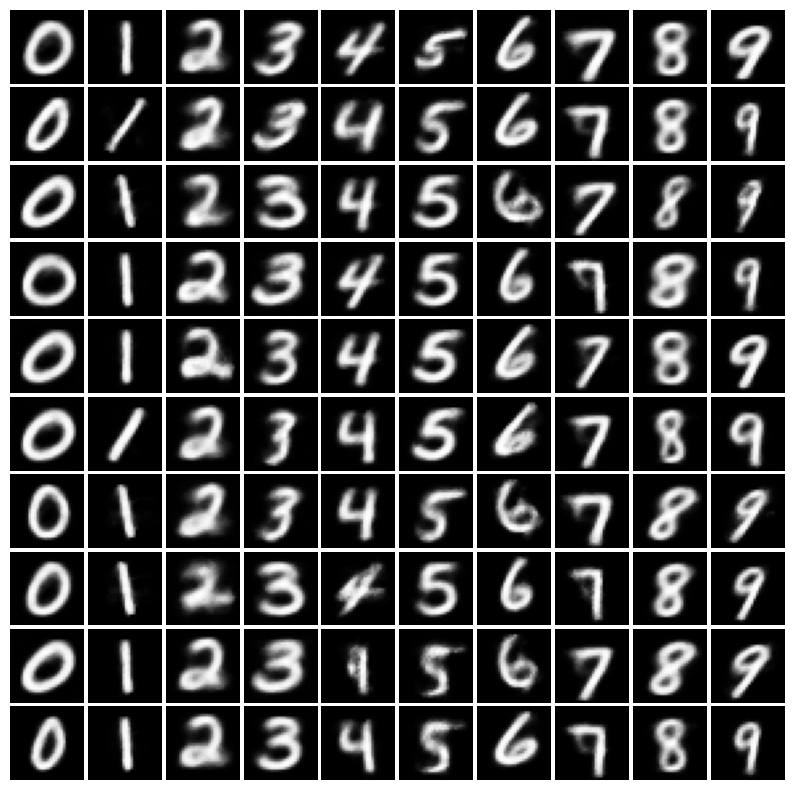

In [15]:
import matplotlib.gridspec as gridspec

fig = plt.figure(figsize=(num_classes, n_samples // num_classes))
gs = gridspec.GridSpec(n_samples // num_classes, num_classes)
gs.update(wspace=0.05, hspace=0.05)
for i, sample in enumerate(samples):
    ax = plt.subplot(gs[i])
    plt.axis('off')
    ax.set_xticklabels([])  # type: ignore
    ax.set_yticklabels([])  # type: ignore
    ax.set_aspect('equal')  # type: ignore
    plt.imshow(sample.reshape(28, 28), cmap='Greys_r')

plt.show()

What do you see? We expect to see some handwritten digits similar to samples in MNIST! However they are not perfect, some of them are blurred.

<span class="instruction">Attach the generated figure to your writeup.</span>